<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/14-Reduccion-Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplos ilustrativos

## PCA

Exploremos cómo funciona [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) y los resultados que produce. 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import make_circles, make_blobs

X,_ = make_blobs(n_samples=1000, centers=1, random_state=1945)

pca = PCA(n_components=2)
X_red = pca.fit_transform(X)
print(X_red.shape)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].title.set_text("Dataset original")
axs[0].scatter(X[:,0],X[:,1],color='blue')
axs[1].title.set_text("Dataset original y componentes principales") 
axs[1].scatter(X_red[:,0],X_red[:,1],alpha=0.25,color='orange',label="PCA (PC 1,2)")
axs[1].scatter(X_red[:,0],[0 for x in X_red],color='green',label="PCA (PC 1)")
axs[1].scatter(X[:,0],X[:,1],alpha=0.4,color='blue',label="Original set")
# Dibujamos los ejes
axs[1].axhline(0,color='gray',linestyle='--')
axs[1].axvline(0,color='gray',linestyle='--')
axs[1].legend(loc='best')
fig.tight_layout()
fig.show()

In [ ]:
from sklearn.datasets import make_circles, make_blobs

X,y = make_blobs(n_samples=500, centers=2, random_state=11)

idxs = np.where(y==0)[0]
X[idxs,:] = X[idxs,:] + [[8,5]]
idxs = np.where(y==1)[0]
X[idxs,:] = X[idxs,:] + [[-7,2]]

pca = PCA()
X_red = pca.fit_transform(X)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].title.set_text("Dataset original")
axs[0].scatter(X[:,0],X[:,1],color='blue')
axs[1].title.set_text("Dataset original y componentes principales") 
axs[1].scatter(X_red[:,0],X_red[:,1],alpha=0.25,color='orange',label="PCA (PC 1,2)")
axs[1].scatter(X_red[:,0],[0 for x in X_red],color='green',label="PCA (PC 1)")
axs[1].scatter(X[:,0],X[:,1],alpha=0.4,color='blue',label="Original set")
# Dibujamos los ejes
axs[1].axhline(0,color='gray',linestyle='--')
axs[1].axvline(0,color='gray',linestyle='--')
axs[1].legend(loc='best')
fig.tight_layout()
fig.show()

En este ejemplo podemos ver la perdida de información del conjunto original. 

In [ ]:
from sklearn.datasets import make_moons

X,_ = make_moons(n_samples=500,random_state=1945,noise=0.1)

X = X + [[3,3]]  # Trasladamos todo el dataset para fines de visualización

pca = PCA()
X_red = pca.fit_transform(X)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].title.set_text("Dataset original")
axs[0].scatter(X[:,0],X[:,1],color='blue')
axs[1].title.set_text("Dataset original y componentes principales") 
axs[1].scatter(X_red[:,0],X_red[:,1],alpha=0.25,color='orange',label="PCA (PC 1,2)")
axs[1].scatter(X_red[:,0],[0 for x in X_red],color='green',label="PCA (PC 1)")
axs[1].scatter(X[:,0],X[:,1],alpha=0.4,color='blue',label="Original set")
# Dibujamos los ejes
axs[1].axhline(0,color='gray',linestyle='--')
axs[1].axvline(0,color='gray',linestyle='--')
axs[1].legend(loc='best')
fig.tight_layout()
fig.show()

## t-SNE

In [2]:
from sklearn.manifold import TSNE

* Observar que t-SNE centra los datos en el origen.
* Es diferente hacer t-SNE con dos componentes y tomar la primera, a hacerlo con una componente. 

(1000, 2)
(1000, 1)


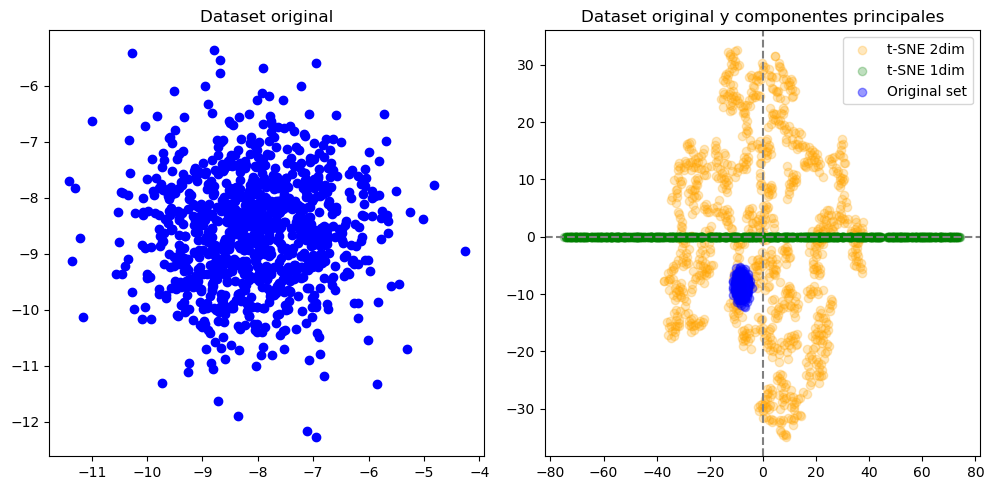

In [5]:
from sklearn.datasets import make_circles, make_blobs

X,_ = make_blobs(n_samples=1000, centers=1, random_state=1945)

tsne = TSNE(n_components=2)
X_red_2 = tsne.fit_transform(X)
print(X_red_2.shape)

tsne = TSNE(n_components=1)
X_red_1 = tsne.fit_transform(X)
print(X_red_1.shape)

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].title.set_text("Dataset original")
axs[0].scatter(X[:,0],X[:,1],color='blue')
axs[1].title.set_text("Dataset original y componentes principales") 
axs[1].scatter(X_red_2[:,0],X_red_2[:,1],alpha=0.25,color='orange',label="t-SNE 2dim")
axs[1].scatter(X_red_1[:,0],[0 for x in X_red_1],alpha=0.25,color='green',label="t-SNE 1dim")
axs[1].scatter(X[:,0],X[:,1],alpha=0.4,color='blue',label="Original set")
# Dibujamos los ejes
axs[1].axhline(0,color='gray',linestyle='--')
axs[1].axvline(0,color='gray',linestyle='--')
axs[1].legend(loc='best')
fig.tight_layout()
fig.show()

Veamos el efecto del hiper-parámetro `perplexity`. Está relacionado con el número de vecinos de cada punto que se toman en cuenta, entre más grande sea el dataset, ḿas grande suele tomarse el parámetro.

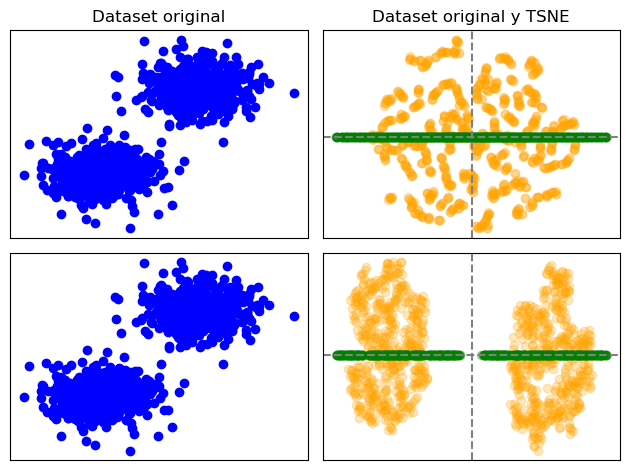

In [6]:
from sklearn.datasets import make_circles, make_blobs

X,_ = make_blobs(n_samples=1000, centers=2, random_state=1945)

tsne = TSNE(n_components=2,perplexity=5)
X_red_2 = tsne.fit_transform(X)

tsne = TSNE(n_components=1,perplexity=5)
X_red_1 = tsne.fit_transform(X)

tsne = TSNE(n_components=2,perplexity=50)
X_red_3 = tsne.fit_transform(X)

tsne = TSNE(n_components=1,perplexity=50)
X_red_4 = tsne.fit_transform(X)

fig, axs = plt.subplots(2,2)
axs[0,0].title.set_text("Dataset original")
axs[0,0].scatter(X[:,0],X[:,1],color='blue')
axs[0,1].title.set_text("Dataset original y TSNE") 
axs[0,1].scatter(X_red_2[:,0],X_red_2[:,1],alpha=0.25,color='orange')
axs[0,1].scatter(X_red_1[:,0],[0 for x in X_red_1],alpha=0.25,color='green')
# Dibujamos los ejes
axs[0,1].axhline(0,color='gray',linestyle='--')
axs[0,1].axvline(0,color='gray',linestyle='--')

axs[1,0].scatter(X[:,0],X[:,1],color='blue')
axs[1,1].scatter(X_red_3[:,0],X_red_3[:,1],alpha=0.25,color='orange')
axs[1,1].scatter(X_red_4[:,0],[0 for x in X_red_4],alpha=0.25,color='green')
# Dibujamos los ejes
axs[1,1].axhline(0,color='gray',linestyle='--')
axs[1,1].axvline(0,color='gray',linestyle='--')

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.show()

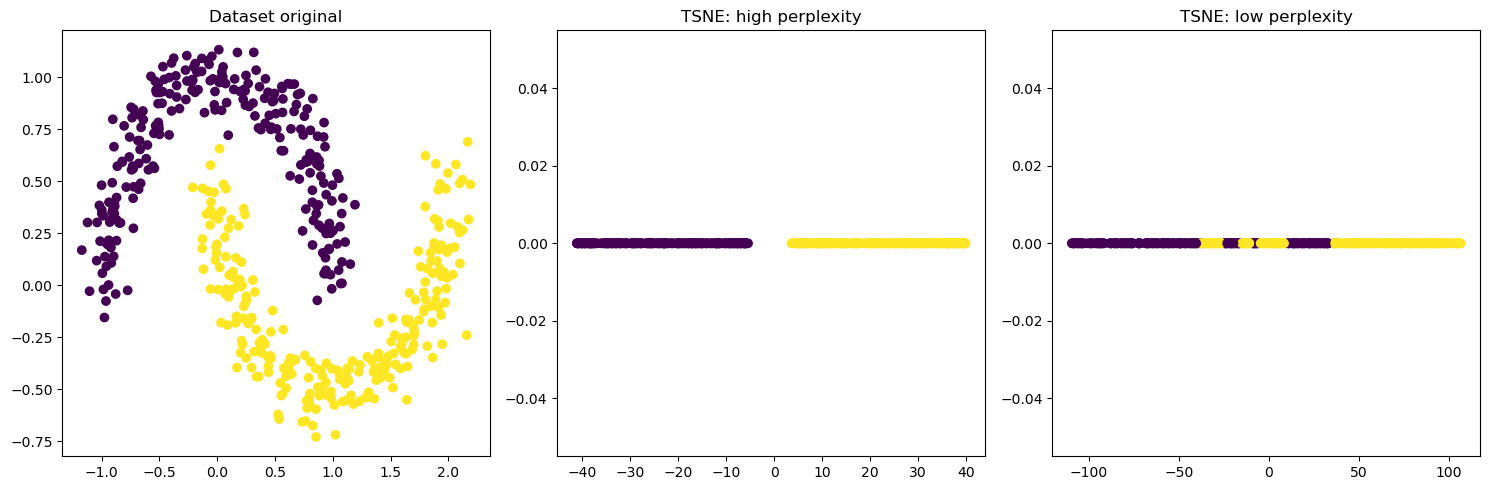

In [7]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,random_state=1945,noise=0.1)

tsne = TSNE(n_components=1,perplexity=35)
X_red_A = tsne.fit_transform(X)

tsne = TSNE(n_components=1,perplexity=7)
X_red_B = tsne.fit_transform(X)

fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].title.set_text("Dataset original")
axs[0].scatter(X[:,0],X[:,1],c=y)
axs[1].title.set_text("TSNE: high perplexity") 
axs[1].scatter(X_red_A[:,0],[0 for x in X_red_A],c=y)
axs[2].title.set_text("TSNE: low perplexity") 
axs[2].scatter(X_red_B[:,0],[0 for x in X_red_B],c=y)
fig.tight_layout()
fig.show()

## UMAP

Uniform Manifold Approximation and Projection (UMAP) es una técnica de reducción dimensional que puede utilizarse para la visualización de forma similar a t-SNE, pero también para la reducción dimensional no lineal general. El algoritmo se basa en tres hipótesis sobre los datos

* Los datos se distribuyen uniformemente en una variedad Riemanniana.
* La métrica Riemanniana es localmente constante (o puede aproximarse como tal).
* La variedad es localmente conexa.

A partir de estos supuestos, es posible modelizar el colector con una estructura topológica difusa. La incrustación se encuentra buscando una proyección de baja dimensión de los datos que tenga la estructura topológica difusa equivalente más cercana posible.

Los detalles pueden verse en [ArXiv](https://arxiv.org/abs/1802.03426):

In [8]:
#!pip install -qq umap-learn

Algunos parámetros importantes de UMAP:

* `n_neighbors`: Número de vecinos en los que se basa para aprender la estructura de los datos. Valores bajos de n_neighbors forzarán a UMAP a concentrarse en la estructura muy local, mientras que valores grandes empujarán a UMAP a mirar vecindarios más grandes de cada punto cuando estime la estructura múltiple de los datos, perdiendo la estructura fina.
* `min_dist` controla lo ajustado que UMAP puede representar los puntos. Controla la distancia mínima entre los puntos en la representación de baja dimensión.

/mnt/run/anaconda3/envs/training9/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/run/anaconda3/envs/training9/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/run/anaconda3/envs/training9/lib/python3.9/site-packages/umap/distanc

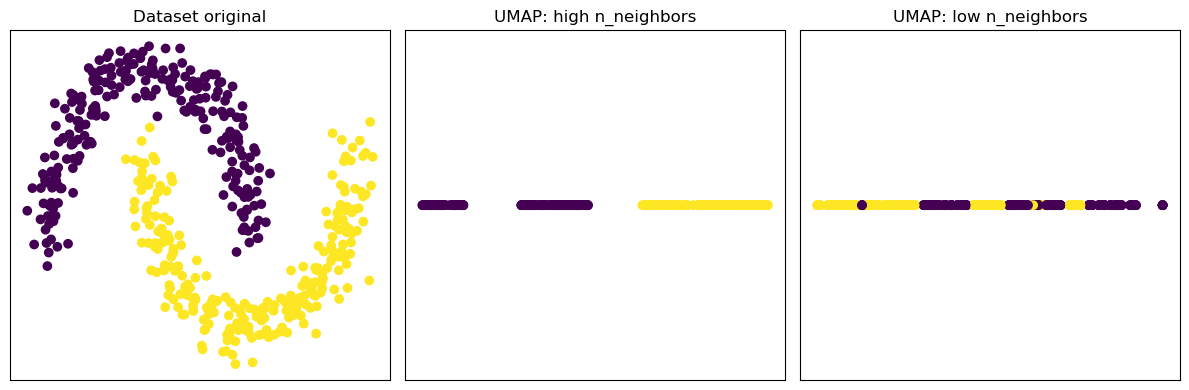

In [9]:
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,random_state=1945,noise=0.1)

umap = UMAP(n_components=1,n_neighbors=50)
X_red_1 = umap.fit_transform(X)

umap = UMAP(n_components=1,n_neighbors=5)
X_red_2 = umap.fit_transform(X)

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].title.set_text("Dataset original")
axs[0].scatter(X[:,0],X[:,1],c=y)
axs[1].title.set_text("UMAP: high n_neighbors") 
axs[1].scatter(X_red_1[:,0],[0 for x in X_red_1],c=y)
axs[2].title.set_text("UMAP: low n_neighbors") 
axs[2].scatter(X_red_2[:,0],[0 for x in X_red_2],c=y)
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.show()

In [ ]:
umap = UMAP(n_components=1,
            n_neighbors=50,
            min_dist=0.9)
X_red_1 = umap.fit_transform(X)

umap = UMAP(n_components=1,
            n_neighbors=50,
            min_dist=0.1)
X_red_2 = umap.fit_transform(X)

fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].title.set_text("Dataset original")
axs[0].scatter(X[:,0],X[:,1],c=y)
axs[1].title.set_text("UMAP: high min_dist") 
axs[1].scatter(X_red_1[:,0],[0 for x in X_red_1],c=y)
axs[2].title.set_text("UMAP: low min_dist") 
axs[2].scatter(X_red_2[:,0],[0 for x in X_red_2],c=y)
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.show()

# Práctica 1: MNIST

En esta práctica aplicaremos reducción de dimensionalidad al conjunto de datos MNIST completo. Usaremos dos técnicas:

1. PCA
2. TSNE

En cada una de ellas visualizaremos los datos y observaremos algunos fenómenos. 

In [11]:
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (len(x_train), -1)) / 255.
x_test = np.reshape(x_test, (len(x_test), -1)) / 255.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

2023-05-20 12:48:18.584508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)
(60000,)
(10000,)


Veamos el coeficiente de silueta de los datos en el espacio de dimensión 784. Es decir,  **¿las clases están separadas claramente en el espacio original de features?**

In [13]:
from sklearn.metrics import silhouette_score

labels = np.unique(y_train)

#silhouette_score(x_train,y_train)    

## 1. PCA

Ahora, apliquemos PCA a los datos. De esta manera, reducimos la dimensión de los puntos, de 784 a sólo 2.

**Importante**: Observa que entrenamos a PCA con el conjunto de entrenamiento y el conjunto de prueba, sólo lo transformamos con el modelo ya entrenado. 

⭕ ¿Por qué no entrenar con todo el conjunto de datos?

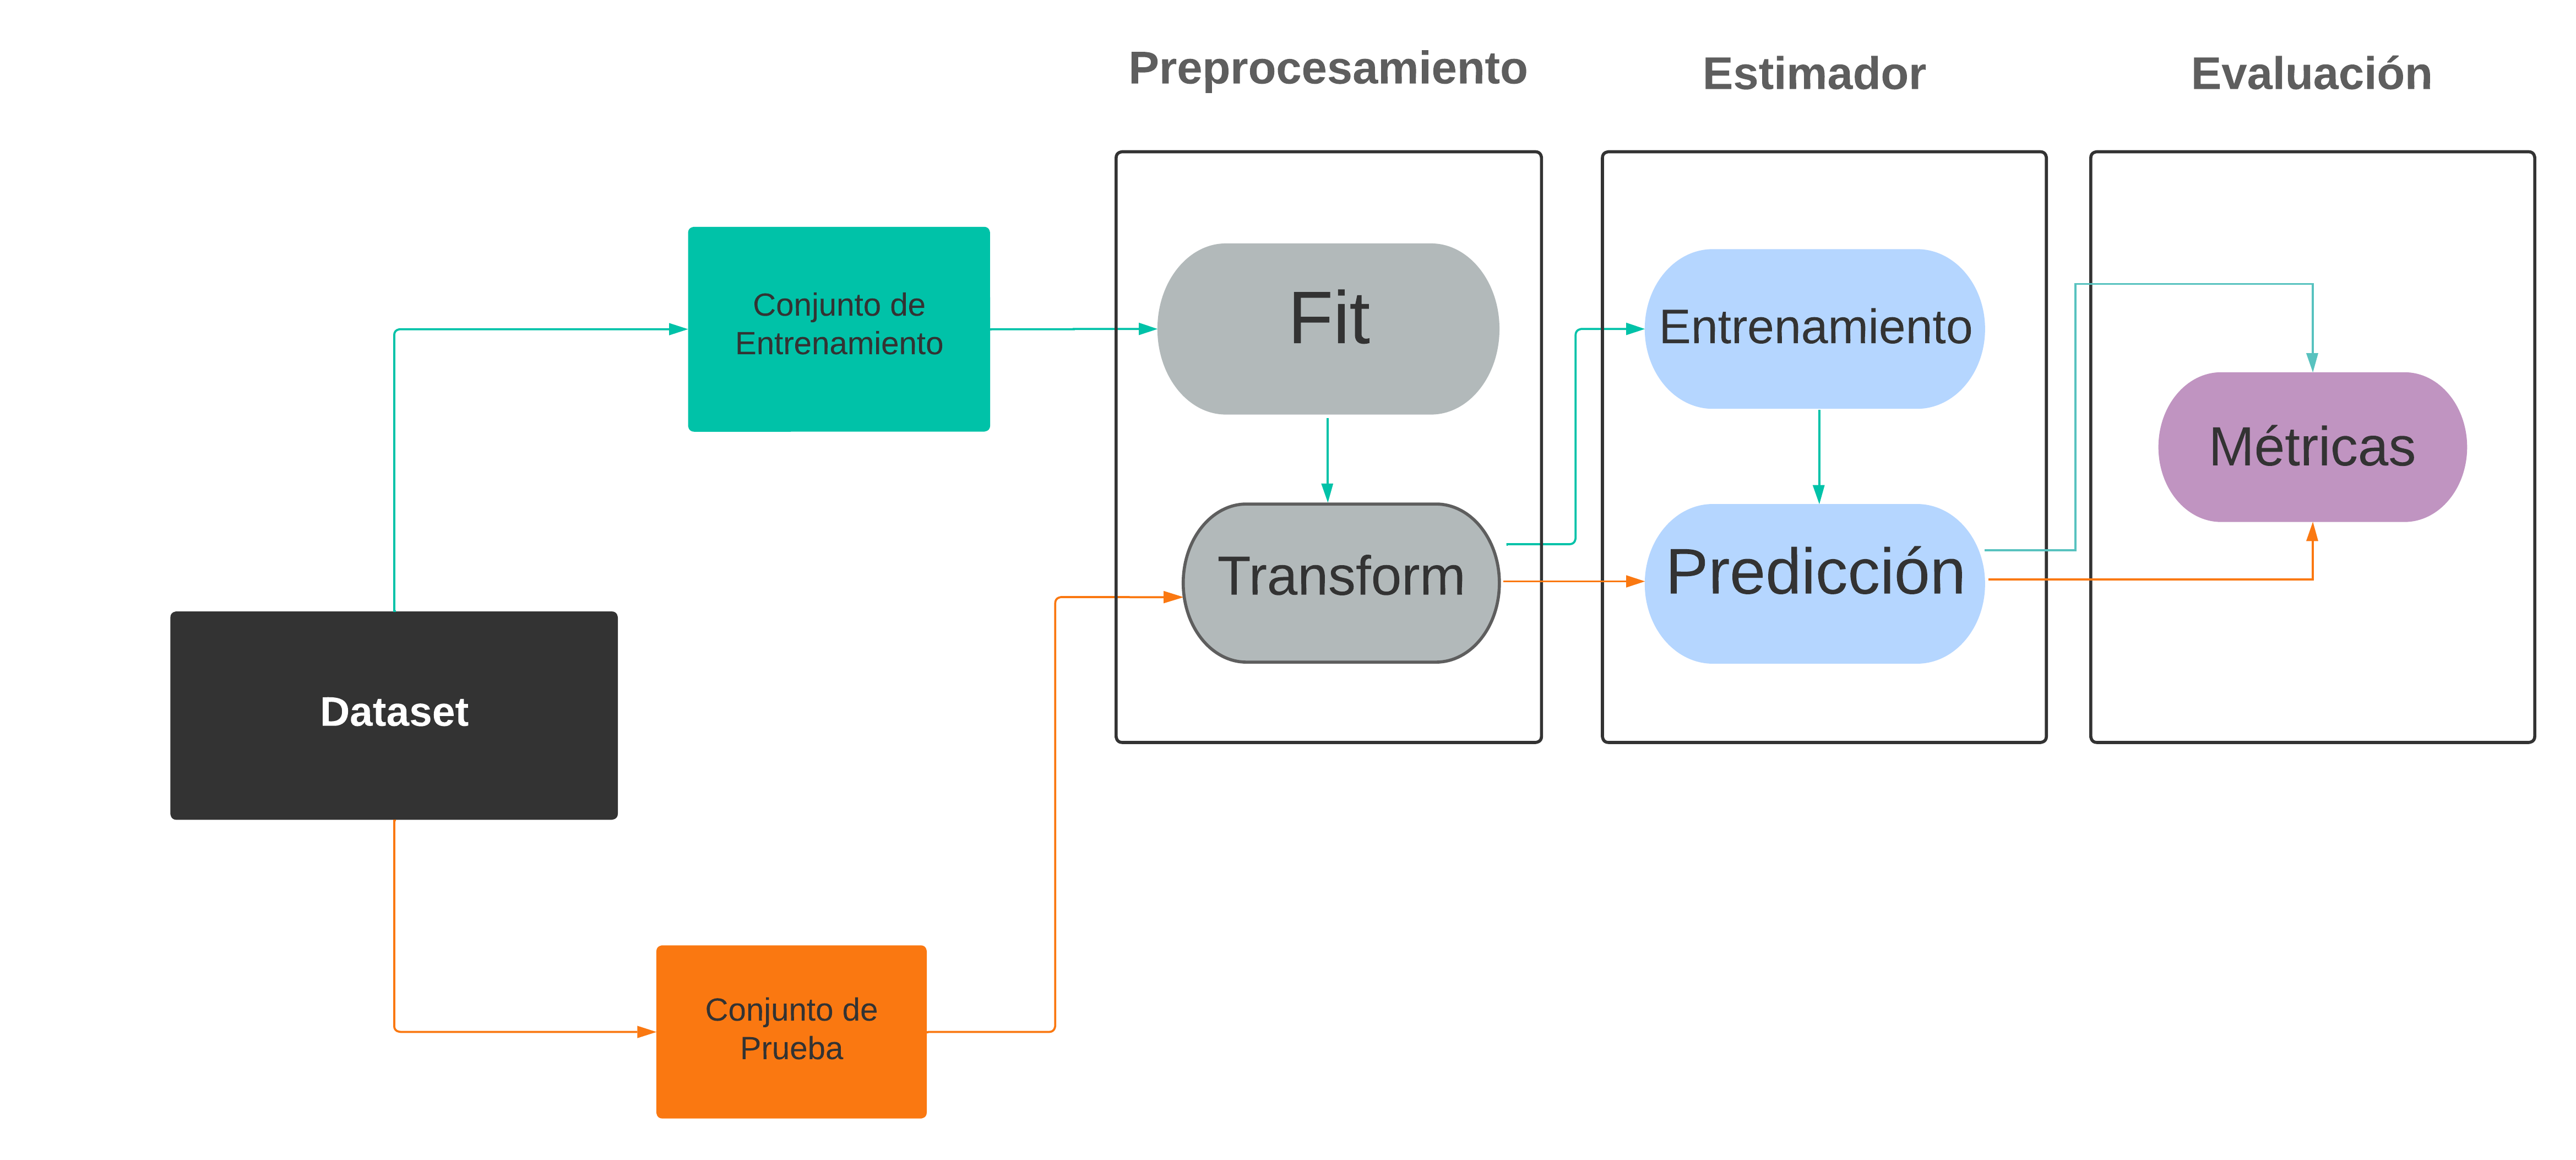

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_red = pca.fit_transform(x_train)
X_test_red = pca.transform(x_test)

print(X_train_red.shape)
print(X_test_red.shape)

(60000, 2)
(10000, 2)


¿Cómo es ahora el score de silueta en este nuevo espacio bidimensional?

In [15]:
print(f"Train: {silhouette_score(X_train_red,y_train)}")
print(f"Test: {silhouette_score(X_test_red,y_test)}")    

Train: 0.023479076251175023
Test: 0.022967858013176506


Ya podemos ver cómo se ve el conjunto de puntos, separado por clases.

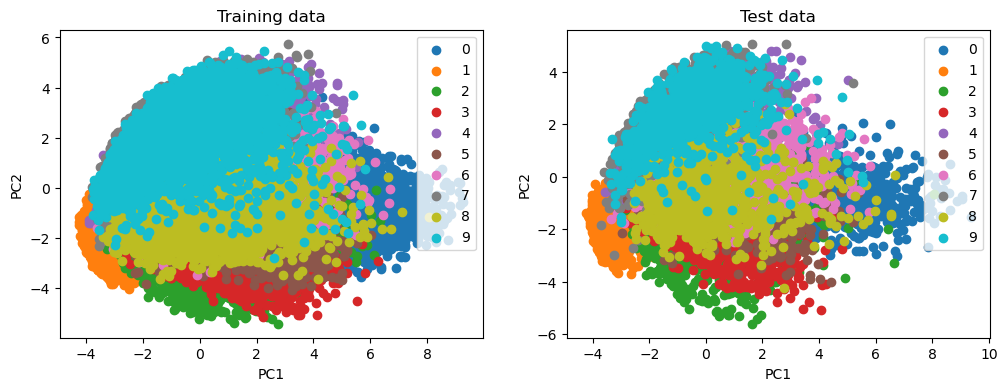

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4),dpi=100)
plt.subplot(1, 2, 1)
plt.title("Training data")
for k in range(10):
  plt.scatter(X_train_red[y_train==k, 0], X_train_red[y_train==k, 1], label=k)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1, 2, 2)
plt.title("Test data")
for k in range(10):
  plt.scatter(X_test_red[y_test==k, 0], X_test_red[y_test==k, 1], label=k)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Varianza explicada

Veamos la varianza agregada por cada una de las primeras 20 componentes principales, usando el atributo `explained_variance_ratio_` de la clase PCA. 

Este es un arreglo que contiene la varianza, como fracción, asociada a cada componente principal. En el caso de nuestro modelo, son dos componentes principales, por lo que es un arreglo de dos componentes.

In [17]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924])

Entre estas dos componentes explican alrededor del 16% de la varianza de los datos.

In [18]:
np.sum(pca.explained_variance_ratio_)

0.16800588414127127

Veamos como es la varianza explicada considerando 20 componentes principales. Para esto, tenemos primero que entrenar un nuevo modelo de PCA, con 20 componentes principales.

In [19]:
pca = PCA(n_components=20).fit(x_train)

Graficamos

Varianza explicada por cada una de las componentes principales:
[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.0202299
 0.01715818 0.01692111 0.01578634 0.01482951 0.01324556 0.01276642
 0.01187187 0.01152501]

Varianza acumulada explicada por cada una de las componentes principales:
[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.5294716
 0.54662978 0.56355089 0.57933723 0.59416674 0.6074123  0.62017871
 0.63205058 0.64357559]



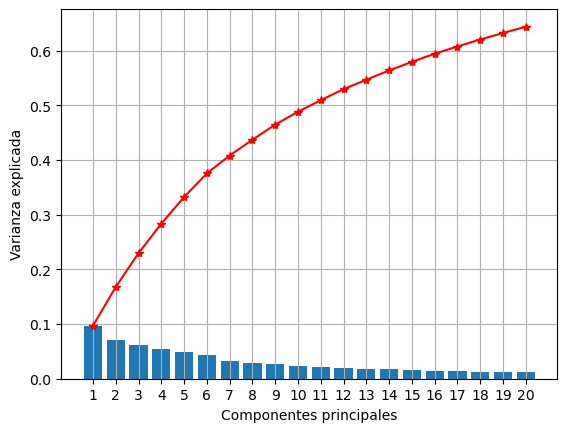

In [20]:
xs = list(range(1, pca.explained_variance_ratio_.shape[0]+1))

plt.bar(xs, pca.explained_variance_ratio_)
plt.xticks(xs)
plt.plot(xs, np.cumsum(pca.explained_variance_ratio_), '-*',color='red')
plt.grid()
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada")
print(f"Varianza explicada por cada una de las componentes principales:\n{pca.explained_variance_ratio_}\n")
print(f"Varianza acumulada explicada por cada una de las componentes principales:\n{np.cumsum(pca.explained_variance_ratio_)}\n")

Varianza de todas las componentes principales.

In [21]:
pca = PCA(n_components=784).fit(x_train)

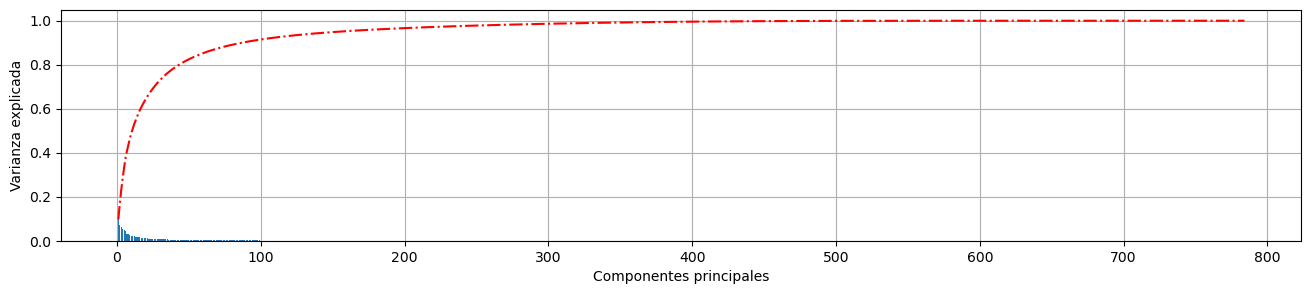

In [22]:
xs = list(range(1, pca.explained_variance_ratio_.shape[0]+1))

plt.figure(figsize=(16, 3))
plt.bar(xs, pca.explained_variance_ratio_)
plt.plot(xs, np.cumsum(pca.explained_variance_ratio_), '-.',color='red')
plt.grid()
plt.xlabel("Componentes principales")
plt.ylabel("Varianza explicada")
plt.show()

¿Con cuántas componentes principales conseguiríamos 95% de la varianza?

⭕ Si queremos entrenar un clasificador, ¿es mejor entrenar en los datos 2-dimensionales, en el conjunto completo o en un conjunto intermedio?

## 2. t-SNE

Ahora, exploremos [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) "t-distributed Stochastic Neighbor Embedding". 

Este método puede ser más tardado con una cantidad grande de datos y dimensiones, por lo que podemos tomar una muestra de los datos originales. Esta muestra consta de los primeros 5000 datos.

In [24]:
train_sample_size = 5000

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_red = tsne.fit_transform(x_train[:train_sample_size])
print(X_train_red.shape)

(5000, 2)


🔵 Observar que t-SNE no tiene un método `transform`, ¿qué significa esto?

Transformemos el conjunto de datos dos veces, de manera independiente para observar la naturaleza probabilística del método.

In [26]:
test_sample_size = 2000

X_test_red_1 = TSNE(n_components=2).fit_transform(x_test[:test_sample_size])
print(X_test_red_1.shape)

X_test_red_2 = TSNE(n_components=2).fit_transform(x_test[:test_sample_size])
print(X_test_red_2.shape)

(2000, 2)
(2000, 2)


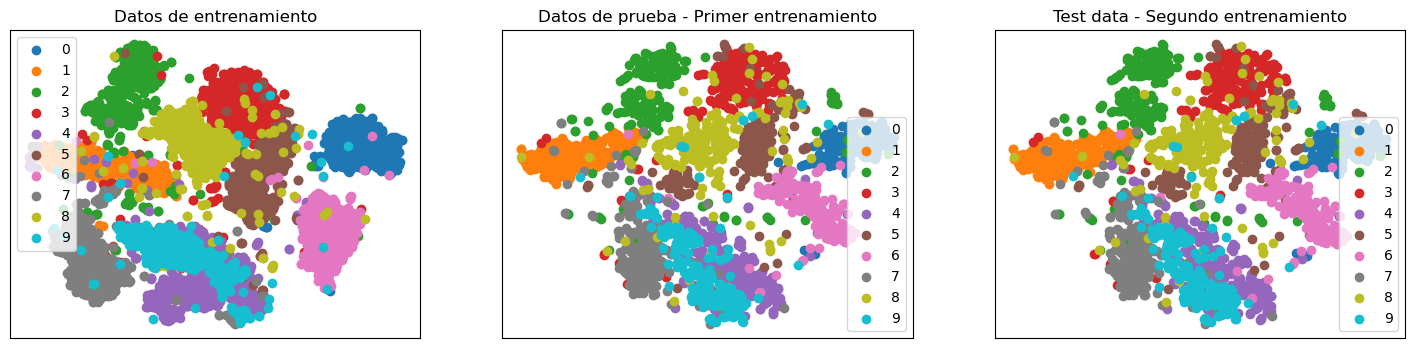

In [28]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Datos de entrenamiento")
for k in range(10):
    plt.scatter(X_train_red[y_train[:train_sample_size]==k, 0], X_train_red[y_train[:train_sample_size]==k, 1], label=k)
plt.legend()
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.title("Datos de prueba - Primer entrenamiento")
for k in range(10):
    plt.scatter(X_test_red_1[y_test[:test_sample_size]==k, 0], 
                X_test_red_1[y_test[:test_sample_size]==k, 1], 
                label=k)
plt.xticks([])
plt.yticks([])
plt.legend()

plt.subplot(1, 3, 3)
plt.title("Test data - Segundo entrenamiento")
for k in range(10):
    plt.scatter(X_test_red_2[y_test[:test_sample_size]==k, 0], 
                X_test_red_2[y_test[:test_sample_size]==k, 1], 
                label=k)
plt.xticks([])
plt.yticks([])
plt.legend()

plt.show()

## 3. SOM

**PENDIENTE**

Spoiler del módulo que sigue

In [29]:
#!pip install -qq minisom

In [30]:
from minisom import MiniSom

In [31]:
som = MiniSom(30, 30, 784, sigma=4, learning_rate=0.5)
som.train(x_train, 2000, random_order=True)

In [32]:
# Map training and test sets (puede tardar unos 5 minutos)
z_train = np.array([som.winner(x) for x in x_train])
z_test = np.array([som.winner(x) for x in x_test])

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 4),dpi=100)
plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
  plt.scatter(z_train[y_train==cl, 0], z_train[y_train==cl, 1], label=cl)
plt.xticks([])
plt.yticks([])
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Test data")
for cl in range(10):
  plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.xticks([])
plt.yticks([])
plt.legend(loc='best')
plt.show()

## ⭕ Práctica

* Entrena un clasificador con estas representaciones bidimensionales de los datos de entrenamiento. Usa PCA y t-SNE.
* Reporta las métricas de clasificación sobre el conjunto de prueba: Precisión, Recall, Precision, F1score.
* Cambia el número de componentes de la reducción de dimensionalidad con el objetivo de tener mejores métricas de rendimiento. 
* Finalmente, realiza la tarea de clasificación usando todas las dimensiones. 

¿Con qué features tuviste mejores desempeños? ¿qué reducción de dimensionalidad funcionó mejor?

In [33]:
from sklearn.svm import SVC 

In [36]:
from sklearn import preprocessing
classifier = SVC(C=1, kernel= 'rbf', random_state=0, gamma='scale')
classifier.fit(X_train_red, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [5000, 60000]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}") print(f"Recall: {round(recall_score(y_test,y_pred),5)}") print(f"Precision: {round(precision_score(y_test,y_pred),3)}") 

# Práctica 2: Documentos de Wikipedia

<h3><center>
    
**Modelado de texto usando técnicas de reducción de dimensionalidad**
<br>
Aplicación en WikiPedia para medir semejanza entre documentos

Descubrir temas es útil para diversos fines, como agrupar documentos, organizar contenido disponible en línea para recuperar información y hacer recomendaciones. El modelado de temas es una técnica de minería de texto que proporciona métodos para identificar palabras clave concurrentes, con el fin de resumir grandes colecciones de información textual. Ayuda a descubrir temas ocultos en el documento, anotar los documentos con estos temas y organizar una gran cantidad de datos no estructurados. Numerosos proveedores de contenido y agencias de noticias están utilizando modelos de temas para recomendar artículos a los lectores. 

Utilizaremos la técnica de reducción de dimensionalidad PCA con el propósito de modelar documentos y establecer semejanzas entre ellos. 

Usaremos el modelo de bolsa de palabras (BoW -- Bag of words), que da como resultado una matriz documento-término que representa documentos en función del conteo de términos. 


## 1. Conjuntos de datos

In [ ]:
import sys
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob # Módulo para encontrar archivos

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/02-Machine-Learning/data/spanishText_180000_185000"
!wget --no-cache --backups=1 {url}

Este conjunto de datos completo puede encontrarse [aquí](https://www.cs.upc.edu/~nlp/wikicorpus/). Estos archivos son tipo texto con el contenido raw del texto.

*Para propósitos de este curso, solo usamos un archivo arbitrario de esta colección.*

In [ ]:
archivos = glob.glob('/content/spanishText_180000_185000')
print(archivos)

In [4]:
#@title Funciones para leer el archivo de texto y obtener los documentos

def carga_datos(archivos):
    '''
    Esta función lee el contenido de los archivos, separa el texto con los espacios en blanco,
    convierte todo en minúsculas
    '''
    files = []
    nombres = []
    suma = 0
    print("leyendo...")
    for i,filename in enumerate(archivos):
        with open(filename,encoding="ISO-8859-1") as f:
            content = f.read().split()
        content = [x.strip().lower() for x in content] 
        size = sys.getsizeof(content)//1048576 #tamaño en MB
        suma += size
        files.append(content)
        nombres.append(filename)
        print(filename)

    print(f"tamaño del contenido de archivos cargados: {suma} MB")
    return files, nombres

def lee_documentos(file, nombres):
    stop_words = set(stopwords.words('spanish'))

    #conjunto de palabras únicas --vocabulario
    vocabulario = set()

    registros = []
    docs = []
    completo = False
    suma = 0
    for i,archivo in enumerate(file):
        for j,cadena in enumerate(archivo):
            if 'id=' in cadena and completo == False:
                id_ = cadena[4:-1]
            elif 'dbindex=' in cadena and completo == False:
                inicio = j+1
            elif 'doc>' in cadena and completo == False:
                fin = j-1
                completo = True
            if completo:
                x = archivo[inicio:fin]
                r=pd.DataFrame(x,columns=['cadena'])
                r=r.cadena.str.translate(\
                        str.maketrans('','',string.digits))\
                        .str.translate(\
                       str.maketrans('','',string.punctuation))\
                .str.replace('«','',regex=False)\
                .str.replace('»','',regex=False).str.replace('(','',regex=False)\
                .str.replace(')','',regex=False).str.strip()
                palabras = r.tolist()
                # eliminar las stopwords
                texto = [w for w in palabras \
                         if not w in stop_words and len(w)>2]
                # generar el texto del documento
                doc = ' '.join(texto)  
                registros.append([id_,doc,i])
                completo = False
                suma += 1
        print(f"archivo {nombres[i]} contiene {suma} documentos\n" )
        suma = 0
        docs.append(registros)
        registros = []
    return docs

In [ ]:
files, nombres = carga_datos(archivos)

Cada documento está segmentado como una lista de elementos

In [ ]:
print(files[0][:20])

## 2. Extracción y pre-procesamiento de documentos

Ahora vamos a identificar cada documento y elaborar una lista de los mismos.

Como hemos visto, los archivos de Wikipedia traen el identificador de documento ```id=``` (ej. _id="1842224"_) y marcadores de inicio y fin de documento, que se reconocen por el caracter ```">"``` (p.ej. _dbindex="430000">_ y ```</doc>```). 

Lo que vamos a hacer es obtener los indices en donde se encuentran estos datos para extraer el id de documento y su contenido textual. Esto con el fin de construir una lista de documentos.

Los textos se limpian y procesan usando el módulo ```nltk``` (Natural Language ToolKit) (Loper and Bird, 2002). 

Al final tendremos una lista cuyo contenido será como sigue:

```
docs->[[id_doc1,texto del documento doc1],[id_doc2,texto del documento doc2], ... ]
```

Tendremos una lista de un archivo, este archivo es una lista de documentos. Cada documento es una lista de 3 elementos:

* id
* Texto
* clase: todos son clase 1

In [ ]:
docs = lee_documentos(files,nombres)

In [ ]:
print('Se leyeron {} archivos'.format(len(docs)))
print(f"El primer documento:\n id: {docs[0][0][0]}\n texto: {docs[0][0][1][:100]} ...\n clase: {docs[0][0][2]}")

Ahora creamos un dataframe con los datos de los documentos

In [ ]:
df = pd.DataFrame(docs[0],columns = ['doc_id','Texto','clase'])
print(df.shape)
df.head()

## **Extracción de características**

Tratemos de visualizar algunas propiedades de los documentos.

Para ello vamos a utilizar un contador ([Counter](https://docs.python.org/2/library/collections.html#collections.Counter)). Un contador es un contenedor que almacena elementos como claves de diccionario, y sus recuentos se almacenan como valores de diccionario.

Construiremos una columna con el conteo de palabras por documento y otra con la palabra más frecuente en el documento.

**Observación**: Podríamos saltarnos esto y hacerlo directamente con CountVectorizer, pero lo haremos para tener una forma de validación de los datos. Además, de mostrar una forma muy básica de tokenizar y realizar algunas tareas básicas de procesamiento de texto.

In [ ]:
from collections import Counter  # regresa un diccionario con conteos

df['Palabras'] = df['Texto'].apply(lambda x: x.split())
df['Total'] = df['Palabras'].apply(lambda x: len(x))
df['Conteos'] = df['Palabras'].apply(lambda x: Counter(x))

df = df.sort_values(by="Total",ascending=False)
df.reset_index(drop=True,inplace=True)
df.head()

## Reducción del tamaño de las matrices

Para reducir la complejidad espacial de nuestro ejercicio, podemos hacer dos cosas:
1. Un muestreo aleatorio de documentos, lo que nos ayudaría a reducir el vocabulario. 
2. Un recorte en el número de documentos por la cantidad de palabras.
Usaremos el segundo.

Obtenemos el vocabulario.
Para ello vamos a usar el método de tokenización de NLTK

In [ ]:
textos = df['Texto'].values
textos = " ".join(textos)
vocabulario = list(set(word_tokenize(textos))) # Manera de quitar las repeticiones de una lista
print(len(vocabulario),'palabras únicas (tokens)')

Veamos la distribución de número de palabras por documentos

In [ ]:
from seaborn import histplot

longitudes = df['Total'].values
promedio = np.mean(longitudes)
print(f"Promedio: {promedio}")

fig = plt.figure()
ax = plt.subplot()
ax.axvline(promedio,color='black')
histplot(longitudes,ax=ax)
ax.set_xlabel("Longitud del texto")
ax.set_ylabel("Conteos")
plt.show()

Ejemplo de transformar los datos con el logaritmo. Esto puede hacerse cuando se tienen datos en diferentes ordenes de longitud.

In [ ]:
log_longs = np.log(longitudes)
log_promedio = np.mean(log_longs)
print(f"Promedio del logaritmo: {log_promedio}")
print(f"Logaritmo del promedio: {np.log(promedio)}")

fig = plt.figure()
ax = plt.subplot()
histplot(log_longs,ax=ax)
ax.set_xlabel("Logaritmo de la longitud del texto")
ax.set_ylabel("Conteos")
plt.show()

Filtramos algunos documentos de acuerdo a la longitud del texto

In [ ]:
df = df[(df.Total < 200) & (df.Total > 50)]
print(f"Número de documentos con los que nos quedamos: {df.shape[0]}")
df.reset_index(drop=True,inplace=True)
df.head()

Veamos, otra vez, la distribución de número de palabras por documentos.

In [ ]:
from seaborn import histplot

longitudes = df['Total'].values
promedio = np.mean(longitudes)
print(f"Promedio: {promedio}")

fig = plt.figure()
ax = plt.subplot()
ax.plot([promedio,promedio],[0,200],color='black')
histplot(longitudes,ax=ax)
ax.set_xlabel("Longitud del texto")
ax.set_ylabel("Conteos")
plt.show()

Guardamos el dataframe en formato pickle

In [ ]:
df.to_pickle('data_frame.pickle')

Leemos el dataframe previamente almacenado

In [ ]:
df = pd.read_pickle('data_frame.pickle')
df.head()

## Modelo *Bag of Words* (BoW)

Usaremos el modelo BOW de conteos de ocurrencias de palabras que hemos usado para generar features de texto, al igual que antes, usaremos el `CountVectorizer` de scikit-learn.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

docs_list = df['Texto'].values

cv = CountVectorizer(max_features=None)
X_bow = cv.fit_transform(docs_list)
X_bow.shape

(1920, 43448)

In [ ]:
for j in range(5):
    print(f"La fila {j} de la matriz X suma {int(X_bow[j].sum())} conteos, habiamos contado: {df.loc[j,'Total']}.")

## PCA

Ahora, realizaremos PCA a la matriz de conteos.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='auto')

X_pca = pca.fit_transform(np.asarray(X_bow.todense()))

Observa la forma de la matriz obtenida, ¿cuántas componentes principales se obtienen? ¿cuántas *deberíamos* de obtener? 

Esta diferencia tiene que ver con el `svd_solver` usado dado el tamaño de la matriz.

In [ ]:
print(X_pca.shape)

De la siguiente manera podemos guardar y leer el arreglo de numpy.

In [24]:
np.save('X_pca.npy', X_pca)

In [ ]:
Y_pca = np.load('X_pca.npy')

Construimos un dataframe con la matriz de componentes principales y el *id* de cada documento.

In [ ]:
Xpca_df = pd.DataFrame(X_pca)
Xpca_df['doc_id'] = df['doc_id'].copy()

# Reordenamos las columnas, traemos la columna 'id' al principio 
cols = Xpca_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
Xpca_df = Xpca_df[cols]

print(Xpca_df.shape)
Xpca_df.head()

Veamos la proporción de varianza por cada componente principal.

In [ ]:
pca_vr = pca.explained_variance_ratio_
print(pca_vr[:10])

In [ ]:
D = pca_vr

"""Varianza acumulada"""
d = np.cumsum(D)

"""Areas de Graficacion y visualizacion de los datos"""
fig,ax = plt.subplots(figsize=(8,5))

pasos=range(len(D))
datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
ax.plot(datos[:,0],datos[:,1],
        ls='--',
        color='green',
        linewidth=2,
        label='Contribución acumulada')
plt.title('Distribución de Varianzas')
plt.xlabel('Componente',fontsize=14)
plt.ylabel('Proporción',fontsize=14)
plt.grid(True)
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='grey', linestyle='--')
ax.legend()
plt.show()

## Análisis usando PCA

En esta sección, queremos saber que tan bien podemos modelar documentos utilizando estas técnicas de reducción de dimensionalidad. En la sesión pasada ya vimos algunas limitantes de modelar texto usando solamente las matrices de conteos.

Para nuestro fin, eligiremos un número $q$ de componentes principales (que llamaremos _representativas_) para PCA y compara la calidad de los documentos más cercanos (semejantes) a los documentos de análisis mostrados aquí abajo.

## Modelación de documentos utilizando componentes principales

In [23]:
def get_representativos(df,numero=100):
    '''
    Esta función obtiene una representación vectorial de cada documento del dataframe,
    esta representación vectorial consiste en las primeras k componentes principales
    Cada componente es una columna
    '''
    cols = [col for col in df.columns[:numero+1]]
    rep_df = df.loc[:, cols]
    return rep_df

def modela_documentos_rep(df):
    '''
    Regresa un dataframe con el 'id' de Documento y su vector (representación) basada en PCA
    Es decir, todo el vector está en una columna
    '''
    id_ = df['doc_id'].values
    datos = df.drop(columns=['doc_id'])
    datos = datos.values
    dx = []
    for i,doc_id in enumerate(id_):
        dx.append((doc_id,datos[i]))
    do = pd.DataFrame(dx,columns=['doc_id','Vectores'])
    return do

In [ ]:
q = 20  # elegimos un numero q de componentes principales
df_pca = get_representativos(Xpca_df,q)
print(df_pca.shape)
df_pca.head()

## Graficamos los documentos

In [ ]:
X = df_pca.iloc[:,1:].values

plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

## Documentos de análisis

Creamos un dataframe con el *id* y el *texto*. Solamente tomamos los primeros 5 documentos.

In [ ]:
test_docs = df.head().copy()
test_docs.drop(columns=['Total','Conteos','Palabras','clase'],inplace=True)  
# test_docs.index = range(len(test_docs.index))

test_docs

Funciones que calculan el vecino más cercano a cada uno de los documentos de análisis, usando la distancia Euclidiana en las representaciones obtenidas por PCA.

In [27]:
from collections import OrderedDict

def dist_vecinos(id_docu,df):
    dist = []
    candidato = df[df['doc_id']==id_docu]
    candidato = candidato.iloc[:,1].values[0]
    fila = df.index[df['doc_id'] == id_docu].tolist()
    pts = df.drop(df.index[fila])
    id_ = pts['doc_id'].values
    pts = pts.iloc[:,1].values
    for i in range(len(pts)):
        d = np.sqrt(np.sum(np.square(candidato-pts[i])))
        dist.append((id_docu,id_[i],d))
    dist = sorted(dist,key=lambda x: x[2])
    return dist

def k_vecinos_mas_cercanos(docus,df,k=1):
    l = docus['doc_id'].values
    vec = OrderedDict()
    for id_ in l:
        d = dist_vecinos(id_,df)
        for i in range(k):
            if i==0:
                vec[id_]=[[d[i][1],d[i][2]]]
            else:
                vec[id_].append([d[i][1],d[i][2]])
    return vec

Dataframe con el *id* de documento y su representación vectorial

In [ ]:
edf_pca = modela_documentos_rep(df_pca)
print(edf_pca.shape)
edf_pca.head()

Obtenemos el vecino más cercano a cada documento de análisis

In [ ]:
k = 1
vecinos_pca = k_vecinos_mas_cercanos(test_docs,edf_pca,k)
vecinos_pca

Por cada documento de análisis, podemos ver qué documento es el más semejante (el vecino más cercano)

In [ ]:
# id de cada documento a analizar 
doc_names = list(test_docs['doc_id'].values)

vecinos = []
for d in doc_names:
    vecinos.append(vecinos_pca[d][0])
print(vecinos)

In [ ]:
vecinos = dict(vecinos)
for id_ in vecinos.keys():
    txt = df[df.doc_id==id_]['Texto'].values
    vecinos[id_] = list(txt)[0]
vecinos = pd.DataFrame(vecinos.items(),columns=['vecino','Texto_vecino'])
vecinos

Contruimos el dataframe con el documento a analizar y su vecino más cercano. En ambos, incluimos el texto.

In [ ]:
datos_PCA = pd.concat([test_docs,vecinos],axis=1)
datos_PCA = datos_PCA.astype({'Texto':str, 'Texto_vecino':str})
datos_PCA

Observemos los textos completos correspondientes:

In [ ]:
for doc in list(test_docs['doc_id'].values):
    print('\nTexto de referencia:\n')
    print(datos_PCA[datos_PCA.doc_id==doc]['Texto'].values[0][:200])
    print('\nTexto más cercano:\n')
    print(datos_PCA[datos_PCA.doc_id==doc]['Texto_vecino'].values[0][:200])

Veamos las parejas de documentos más cercanos, usando las primeras dos PC.

In [ ]:
test_idxs = [0,1,2,3,4]
nn_ids = list(datos_PCA['vecino'].values)
nn_idxs = [df[df['doc_id']==j].index.to_list()[0] for j in nn_ids]

X = df_pca.iloc[:,1:].values

plt.figure()
plt.scatter(X[:,0],X[:,1], color='gray', alpha=0.25)
for j,k in zip(test_idxs,nn_idxs):
    plt.scatter(X[[j,k],0],X[[j,k],1],marker='x',s=70)
plt.axis('off')
plt.show()

⭕ ¿Qué parámetros podríamos variar para modificar o mejorar estos resultados?

___

## ⭕ Práctica/Tarea

1. Utilizando al menos dos métodos de clustering, haz un análisis de clusters de la matriz PCA de documentos. *En caso de que sea muy tardado puedes escoger un número de componentes principales*.
2. Obten las métricas de rendimiento del clustering. Al menos usa el score de silueta. Usando esta métrica de rendimiento determina los hiperparámetros adecuados del clustering.
3. Tomando algunos puntos (documentos) en cada cluster, visualiza dichos textos para determinar su relación.

Repite los pasos 1, 2, 3 ahora con la matriz TF-IDF de los documentos.
